In [1]:
import random
import math
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [2]:
def randomArray(n):
    # takes an input an integer n and returns an array A such that for each 0 <= i < n A[i]
    # is a uniformly random integer between 1 and n
    A = []
    for i in range(n):
        A.append(random.randint(1, n))
    return A

In [3]:
def Merge(A, p, q, r, count):
    # merge sorted sub-array A[p .. q] and A[q + 1 .. r]
    L = A[p : q  +  1]
    R = A[q + 1 : r + 1]
    
    count[0] += q - p + 1
    count[0] += r - q
    
    temp = []
    
    i, j = 0, 0
    
    count[0] += 3
    
    while i < len(L) and j < len(R):
        count[0] += 3
        if L[i] < R[j]:
            temp.append(L[i])
            i += 1
        else:
            temp.append(R[j])
            j += 1
        count[0] += 3
    count[0] += 3
    
    if i < len(L):
        temp.extend(L[i:])
        count[0] += len(L[i:])
        count[0] += 1
    elif j < len(R):
        temp.extend(R[j:])
        count[0] += len(R[j:])
        count[0] += 1
        
    A[p:r+1] = temp
    count[0] += r - p
                
def MergeSortHelper(A, p, r, count):
    if p < r:
        q = (p + r) // 2
        count[0] += 3
        MergeSortHelper(A, p, q, count)
        MergeSortHelper(A, q + 1, r, count)
        Merge(A, p, q, r, count)
        
def MergeSort(A, n):
    count = [0, ]
    MergeSortHelper(A, 0, n - 1, count)
    return A, count[0]


In [4]:
upper_n = 10**4
count_dict = {}
for i in range(1, upper_n):
    A = randomArray(i)
    A, count = MergeSort(A, i)
    if i % 1000 == 0:
        print i
    count_dict[i] = count

1000
2000
3000
4000
5000
6000
7000
8000
9000


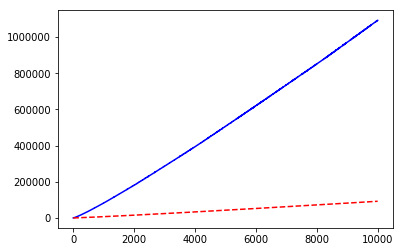

In [5]:
items = count_dict.items()
x, y = zip(*items)
plt.plot(x, y, 'b-')
plt.plot(x, map(lambda y : y*math.log(y), x), 'r--')